In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from typing import List
from dao.email import DAOEmailGenerated, DAORealEmail

from dao.attribute import DAOAttribute

[nltk_data] Downloading package stopwords to /home/pawel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/pawel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package pl196x to /home/pawel/nltk_data...
[nltk_data]   Package pl196x is already up-to-date!
[nltk_data] Downloading package wordnet to /home/pawel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
from models.attribute import AttributeInDB

dao_generated_emails: DAOEmailGenerated = DAOEmailGenerated()
dao_real_emails: DAORealEmail = DAORealEmail()
dao_attribute: DAOAttribute = DAOAttribute()


all_attributes: List[AttributeInDB] = dao_attribute.find_many_by_query({})
all_generated: List[AttributeInDB] = dao_attribute.find_many_by_query({'is_generated': True})
all_real: List[AttributeInDB] = dao_attribute.find_many_by_query({'is_generated': False})

generated_personal: List[AttributeInDB] = dao_attribute.find_many_by_query({"is_generated": True, 'is_personal': True})
real_personal: List[AttributeInDB] = dao_attribute.find_many_by_query({"is_generated": False, 'is_personal': True})

generated_personal = [attribute for attribute in generated_personal if attribute is not None]
real_personal = [attribute for attribute in real_personal if attribute is not None]

pl_generated: List[AttributeInDB] = dao_attribute.find_many_by_query({"is_generated": True, 'language': 'pl'})
pl_real: List[AttributeInDB] = dao_attribute.find_many_by_query({"is_generated": False, 'language': 'pl'})

en_generated: List[AttributeInDB] = dao_attribute.find_many_by_query({"is_generated": True, 'language': 'en'})
en_real: List[AttributeInDB] = dao_attribute.find_many_by_query({"is_generated": False, 'language': 'en'})

pl_generated_personal: List[AttributeInDB] = dao_attribute.find_many_by_query({"is_generated": True, 'language': 'pl', 'is_personal': True})
pl_real_personal: List[AttributeInDB] = dao_attribute.find_many_by_query({"is_generated": False, 'language': 'pl', 'is_personal': True})

en_generated_personal: List[AttributeInDB] = dao_attribute.find_many_by_query({"is_generated": True, 'language': 'en', 'is_personal': True})
en_real_personal: List[AttributeInDB] = dao_attribute.find_many_by_query({"is_generated": False, 'language': 'en', 'is_personal': True})

In [3]:
from ml.data_preparation import convert_db_attributes_to_input_data

generated = en_generated_personal
real = en_real_personal
num_of_features = 10

data = convert_db_attributes_to_input_data(generated, real, num_of_features) #exclude_additionally=['number_of_errors', 'no_space_after_punctuation'])

In [5]:
data[0][0]

{'standard_deviation_sentence_word_length': 7.408703590297622,
 'variance_sentence_word_length': 54.888888888888886,
 'standard_deviation_sentence_char_length': 53.85783756025363,
 'variance_sentence_char_length': 2900.6666666666665,
 'standard_deviation_word_char_length': 3.601590012381192,
 'variance_word_char_length': 12.971450617283953,
 'double_spaces': 0.014388489208633094,
 'no_space_after_punctuation': 0.0035971223021582736,
 'text_errors_by_category.TYPOS': 0.01079136690647482,
 'number_of_errors': 0.01079136690647482}

In [9]:
feature_dicts = [t[0] for t in data]
labels = [t[1] for t in data]

# Convert the list of dictionaries into a DataFrame
features = pd.DataFrame(feature_dicts)
features['label'] = labels

In [10]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the features
features_scaled = scaler.fit_transform(features)

# Combine the normalized features and labels back into a DataFrame
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)


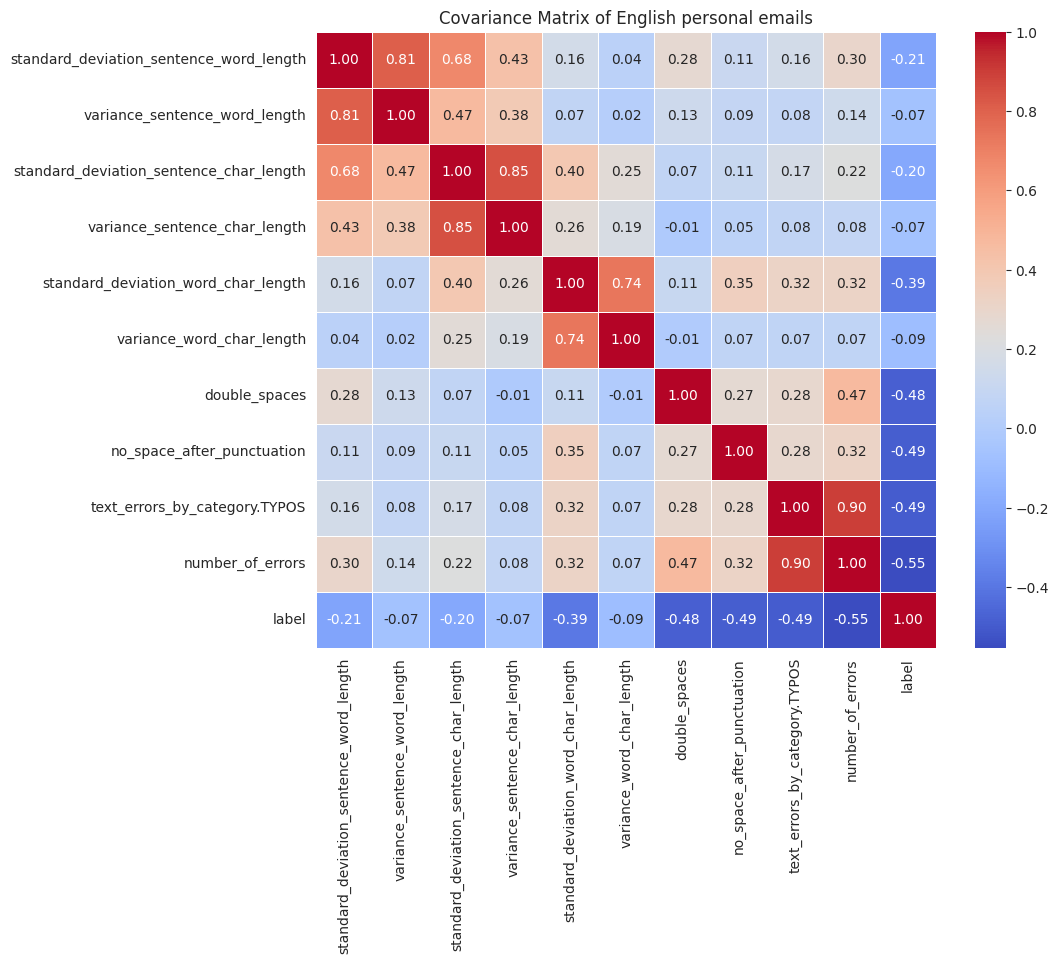

In [12]:
cov_matrix = df_scaled.cov()
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)

# Set titles and labels
plt.title('Covariance Matrix of English personal emails')
plt.show()

In [2]:
eng_full = [
[1  , 0.8416, 0.9054],
[2  , 0.9270, 0.9718],
[4  , 0.9520, 0.9884],
[6  , 0.9711, 0.9950],
[8  , 0.9730, 0.9959],
[10 , 0.9758, 0.9969],
#[12 , 0.9795, 0.9980],
[14 , 0.9799, 0.9981],
#[16 , 0.9807, 0.9982],
#[18 , 0.9809, 0.9983],
[20 , 0.9824, 0.9986],
#[22 , 0.9825, 0.9986],
#[24 , 0.9833, 0.9987],
#[26 , 0.9842, 0.9989],
#[28 , 0.9841, 0.9988],
[30 , 0.9851, 0.9989],
[100, 0.9845, 0.9990],
[244, 0.9851, 0.9991],
]
eng_no_errors = [
[1  , 0.8660, 0.9138],
[2  , 0.8660, 0.9138],
[4  , 0.9293, 0.9705],
[6  , 0.9420, 0.9789],
[8  , 0.9585, 0.9914],
[10 , 0.9660, 0.9942],
#[12 , 0.9678, 0.9953],
[14 , 0.9707, 0.9965],
#[16 , 0.9722, 0.9968],
#[18 , 0.9750, 0.9972],
[20 , 0.9766, 0.9976],
#[22 , 0.9768, 0.9978],
#[24 , 0.9771, 0.9976],
#[26 , 0.9765, 0.9976],
#[28 , 0.9772, 0.9977],
[30 , 0.9763, 0.9977],
[100, 0.9763, 0.9977],
[218, 0.9763, 0.9977],
]

pl_full = [
[1	, 0.8435, 0.8909],
[2  , 0.8819, 0.9493],
[4  , 0.9015, 0.9630],
[6  , 0.8994, 0.9667],
[8  , 0.9088, 0.9734],
[10 , 0.9243, 0.9754],
#[12 , 0.9150, 0.9770],
[14 , 0.9285, 0.9779],
#[16 , 0.9253, 0.9769],
#[18 , 0.9399, 0.9811],
[20 , 0.9378, 0.9838],
#[22 , 0.9409, 0.9840],
#[24 , 0.9420, 0.9841],
#[26 , 0.9430, 0.9848],
#[28 , 0.9461, 0.9856],
[30 , 0.9409, 0.9851],
[100, 0.9440, 0.9851],
[220, 0.9492, 0.9849],
]

pl_no_errors = [
[1  , 0.8415, 0.8887],
[2  , 0.8580, 0.9154],
[4  , 0.8695, 0.9336],
[6  , 0.8767, 0.9430],
[8  , 0.8984, 0.9588],
[10 , 0.9015, 0.9624],
#[12 , 0.9109, 0.9653],
[14 , 0.9140, 0.9731],
#[16 , 0.9192, 0.9722],
#[18 , 0.9212, 0.9773],
[20 , 0.9202, 0.9779],
#[22 , 0.9202, 0.9755],
#[24 , 0.9181, 0.9771],
#[26 , 0.9202, 0.9770],
#[28 , 0.9181, 0.9762],
[30 , 0.9213, 0.9769],
[100, 0.9213, 0.9758],
[194, 0.9171, 0.9780],
]

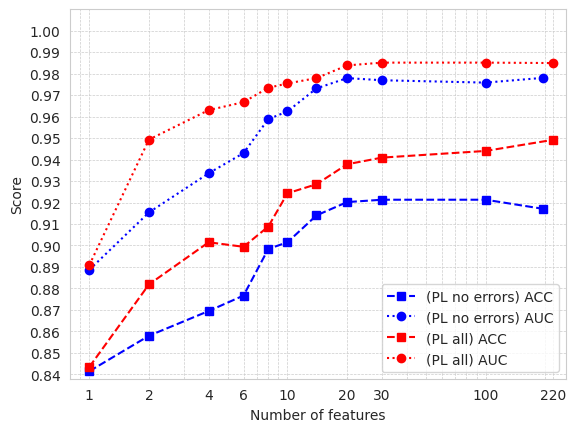

In [4]:
pl_full = np.array(pl_full)
pl_no_errors = np.array(pl_no_errors)

# Plotting
fig, ax = plt.subplots()

# Set logarithmic scale for x-axis
ax.set_xscale('log')

# Plot Polish data
ax.plot(pl_no_errors[:, 0], pl_no_errors[:, 1], marker='s', linestyle='--', color='blue', label='(PL no errors) ACC')
ax.plot(pl_no_errors[:, 0], pl_no_errors[:, 2], marker='o', linestyle=':', color='blue', label='(PL no errors) AUC')
ax.plot(pl_full[:, 0], pl_full[:, 1], marker='s', linestyle='--', color='red', label='(PL all) ACC')
ax.plot(pl_full[:, 0], pl_full[:, 2], marker='o', linestyle=':', color='red', label='(PL all) AUC')

# Set labels
ax.set_xlabel('Number of features')
ax.set_ylabel('Score')
ax.set_xlim([0.8, 255])
ax.set_ylim([0.838, 1.01])

# Set ticks
ax.set_xticks([1, 2, 4, 6, 10, 20, 30, 100, 220])
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.set_yticks(np.arange(0.84, 1.0, 0.01))

# Enable grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Legend
ax.legend(loc='lower right')

# Title and show plot
#plt.title('Classification accuracy ACC and AUC against the number of features used for classification with Random Forest for Polish (PL) emails')
plt.savefig('classification_accuracy_auc_polish.png')
plt.show()

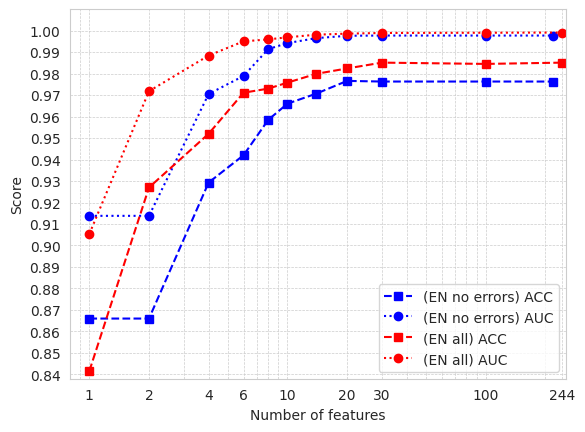

In [5]:
eng_full = np.array(eng_full)
eng_no_errors = np.array(eng_no_errors)

# Plotting
fig, ax = plt.subplots()

# Set logarithmic scale for x-axis
ax.set_xscale('log')

# Plot Polish data
ax.plot(eng_no_errors[:, 0], eng_no_errors[:, 1], marker='s', linestyle='--', color='blue', label='(EN no errors) ACC')
ax.plot(eng_no_errors[:, 0], eng_no_errors[:, 2], marker='o', linestyle=':', color='blue', label='(EN no errors) AUC')
ax.plot(eng_full[:, 0], eng_full[:, 1], marker='s', linestyle='--', color='red', label='(EN all) ACC')
ax.plot(eng_full[:, 0], eng_full[:, 2], marker='o', linestyle=':', color='red', label='(EN all) AUC')

# Set labels
ax.set_xlabel('Number of features')
ax.set_ylabel('Score')
ax.set_xlim([0.8, 255])
ax.set_ylim([0.838, 1.01])

# Set ticks
ax.set_xticks([1, 2, 4, 6, 10, 20, 30, 100, 244])
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.set_yticks(np.arange(0.84, 1.0, 0.01))

# Enable grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Legend
ax.legend(loc='lower right')

# Title and show plot
#plt.title('Classification accuracy ACC and AUC against the number of features used for classification with Random Forest for Polish (PL) emails')
plt.savefig('classification_accuracy_auc_english.png')
plt.show()

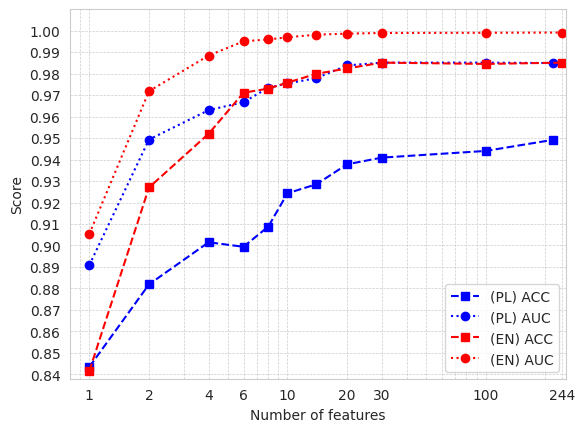

In [6]:
pl_full = np.array(pl_full)
eng_full = np.array(eng_full)

# Plotting
fig, ax = plt.subplots()

# Set logarithmic scale for x-axis
ax.set_xscale('log')

# Plot Polish data
ax.plot(pl_full[:, 0], pl_full[:, 1], marker='s', linestyle='--', color='blue', label='(PL) ACC')
ax.plot(pl_full[:, 0], pl_full[:, 2], marker='o', linestyle=':', color='blue', label='(PL) AUC')
ax.plot(eng_full[:, 0], eng_full[:, 1], marker='s', linestyle='--', color='red', label='(EN) ACC')
ax.plot(eng_full[:, 0], eng_full[:, 2], marker='o', linestyle=':', color='red', label='(EN) AUC')

# Set labels
ax.set_xlabel('Number of features')
ax.set_ylabel('Score')
ax.set_xlim([0.8, 255])
ax.set_ylim([0.838, 1.01])

# Set ticks
ax.set_xticks([1, 2, 4, 6, 10, 20, 30, 100, 244])
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.set_yticks(np.arange(0.84, 1.0, 0.01))

# Enable grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Legend
ax.legend(loc='lower right')

# Title and show plot
#plt.title('Classification accuracy ACC and AUC against the number of features used for classification with Random Forest for Polish (PL) emails')
plt.savefig('classification_accuracy_auc_both.png')
plt.show()